For this Assignment, I will be using data from San Franciso Police Department on the number of crimes that happened in the month of June 2019

In [48]:
#Installing all the required libraries for this assignment
import numpy as np 
import pandas as pd
import json
#loading the data into dataframe
crime_data = pd.read_csv('SFPD_crime_report.csv')
crime_data.head()

,Incident Date,Incident Time,Incident Day of Week,Incident Category,Incident Subcategory,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude
0,05-06-2019,14:00,Wednesday,Non-Criminal,Non-Criminal,Northern,Western Addition,5,37.782685,-122.422464
1,10-06-2019,11:00,Monday,Non-Criminal,Non-Criminal,Richmond,Inner Richmond,1,37.779091,-122.464145
2,10-06-2019,18:57,Monday,Assault,Simple Assault,Tenderloin,Tenderloin,6,37.784449,-122.416072
3,10-06-2019,01:30,Monday,Assault,Simple Assault,Ingleside,Outer Mission,11,37.723168,-122.442554
4,09-06-2019,23:08,Sunday,Malicious Mischief,Vandalism,Central,Financial District/South Beach,3,37.792487,-122.405654


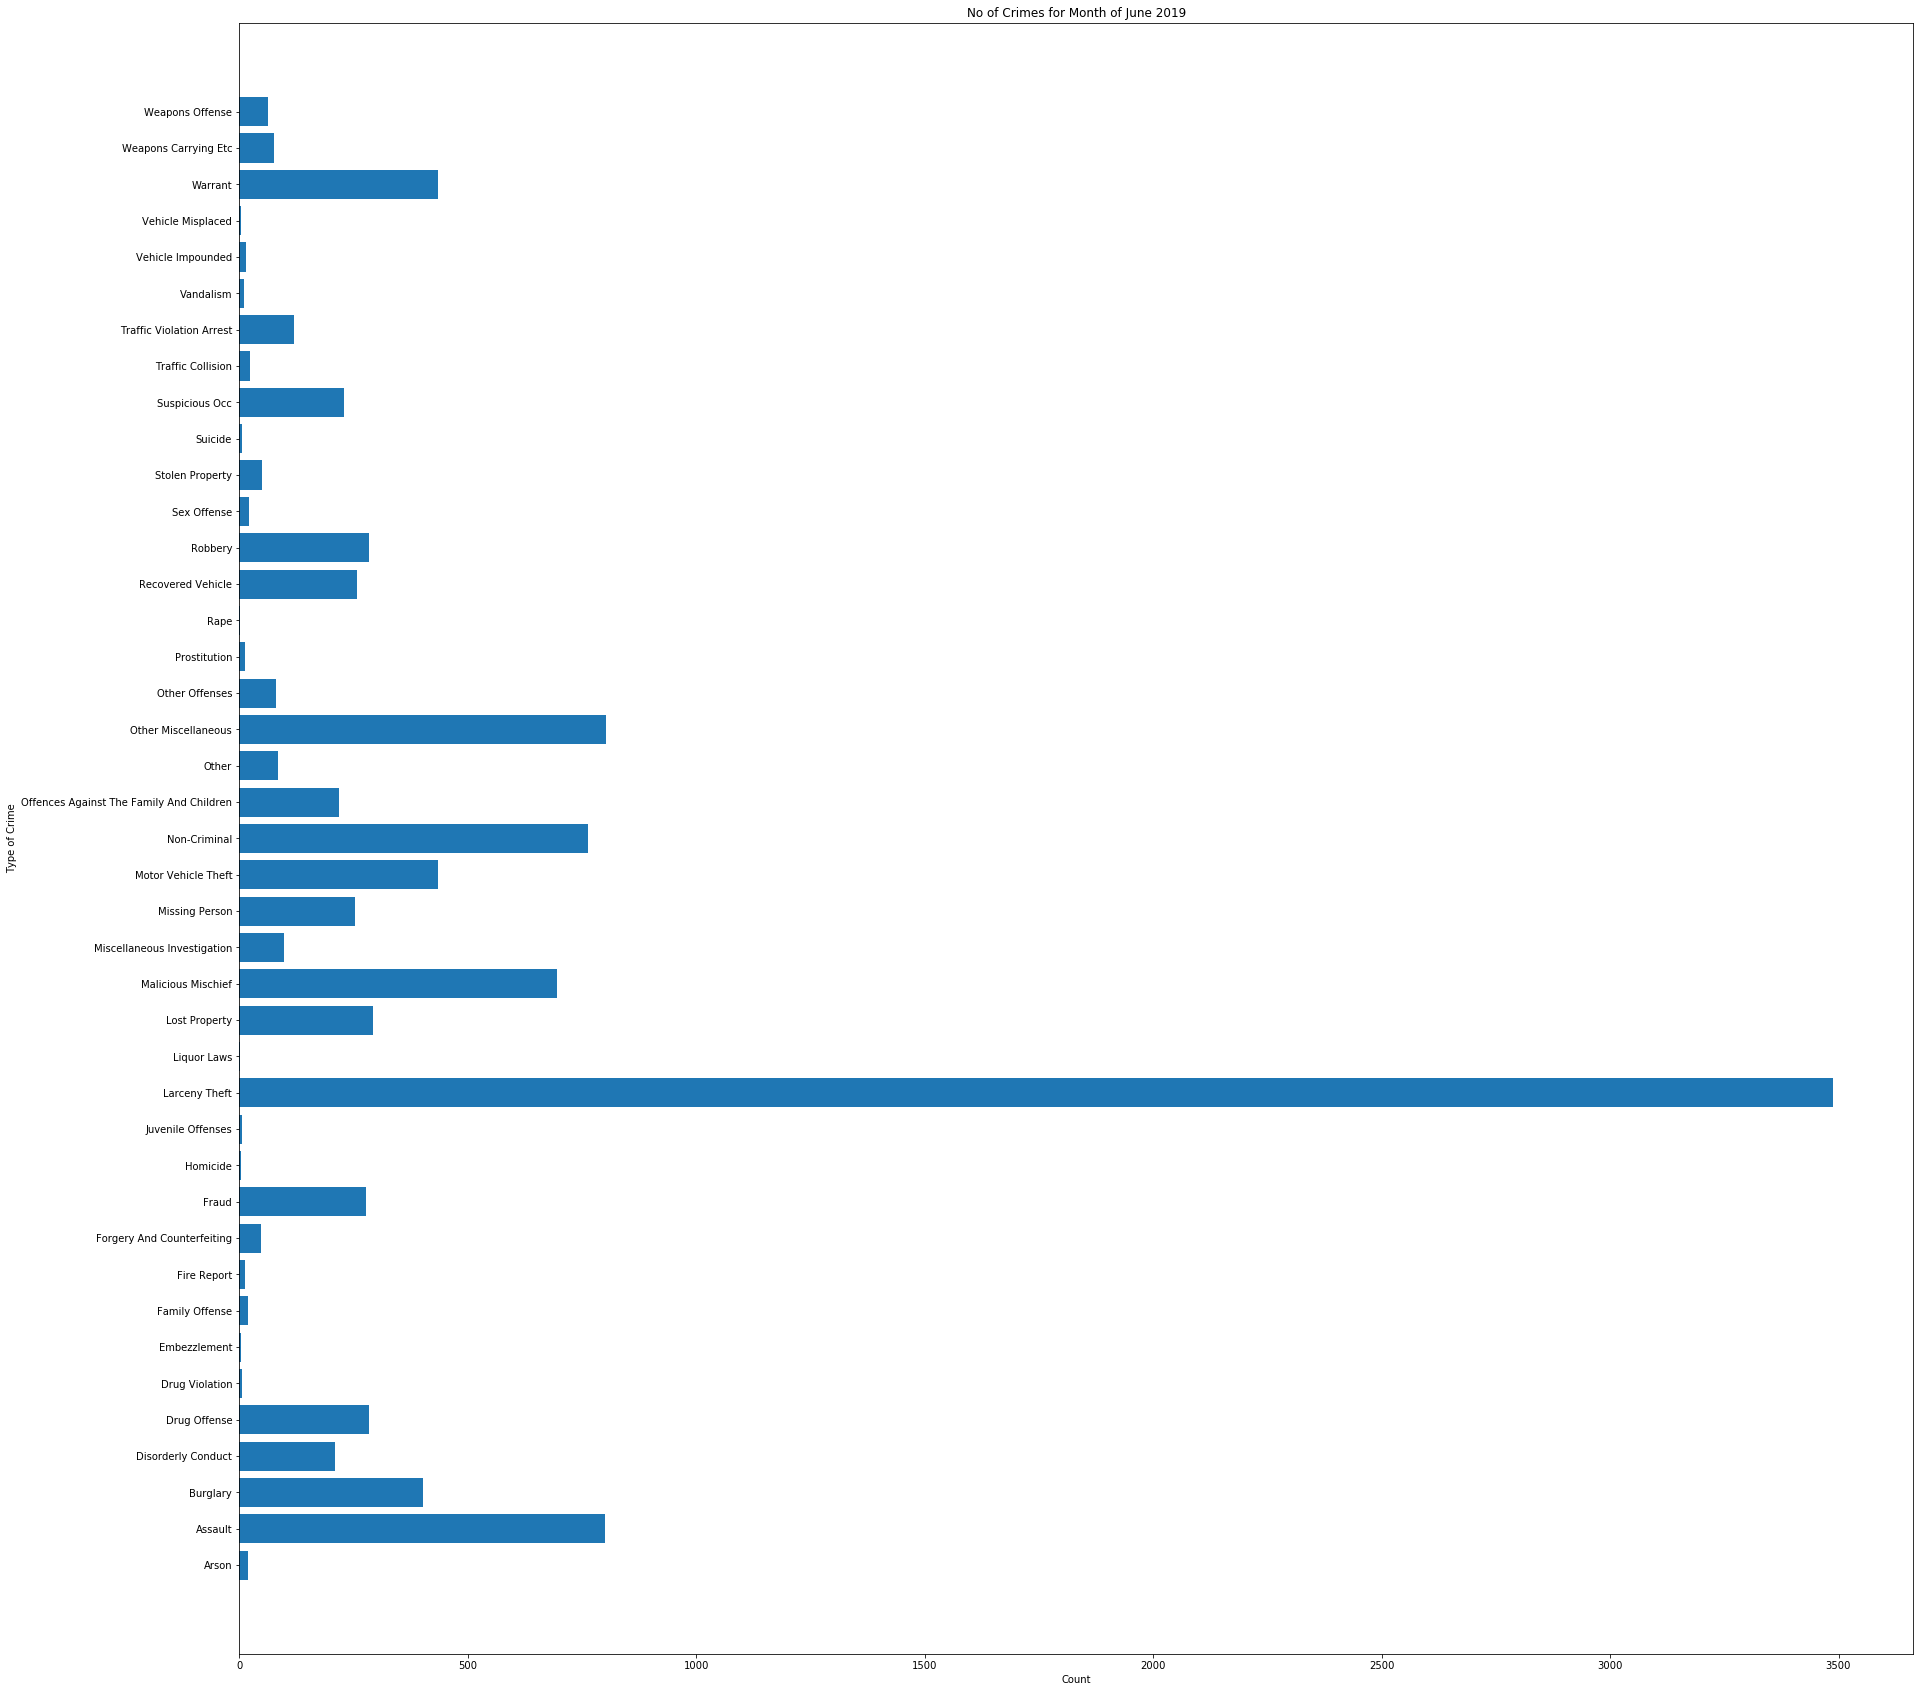

In [49]:
#Analysing the data using describe function
crime_data.describe(include = 'all')

#Plotting the values to see the frequency of crimes.
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (30,30)
crime_count = crime_data.groupby('Incident Category').size()
crime_type = crime_count.index.tolist()
crime_no = crime_count.tolist()
y_pos = np.arange(len(crime_type))
plt.barh(y_pos, crime_no)
plt.yticks(y_pos,crime_type)
plt.xlabel('Count')
plt.ylabel('Type of Crime')
plt.title('No of Crimes for Month of June 2019')
plt.show()

Since the type of crimes is high, we will restrict our view to top 15

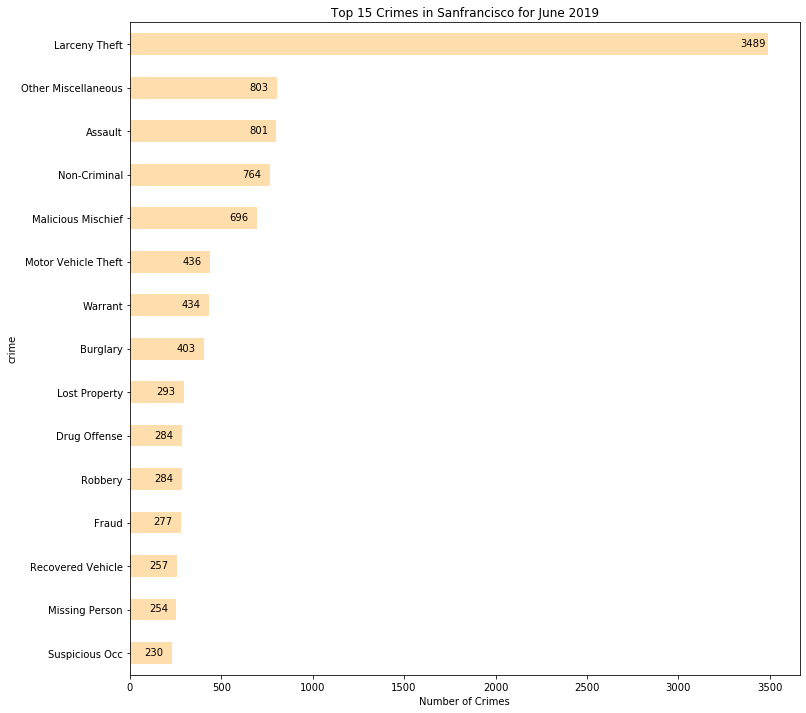

count      15.000000
mean      647.000000
std       814.893683
min       230.000000
25%       280.500000
50%       403.000000
75%       730.000000
max      3489.000000
Name: occurence, dtype: float64


In [50]:
crime_bar = pd.DataFrame({'crime':crime_type,'occurence':crime_no})
#Setting the index to column 'crime'
crime_bar.set_index('crime', inplace=True)
crime_bar.sort_values(by='occurence', ascending=True, inplace=True)
crime_top15 = crime_bar['occurence'].tail(15)

#plotting the data using horizontal bar chart.
ax = crime_top15.plot(kind='barh', figsize=(12, 12), color='navajowhite')
ax.set_xlabel('Number of Crimes')
ax.set_title('Top 15 Crimes in Sanfrancisco for June 2019')
for label in ax.patches:
    width, height = label.get_width(), label.get_height()
    x, y = label.get_xy() 
    ax.annotate(width, (width - 150, y + .20))
plt.show()
print(crime_top15.describe(include ='all'))

Analysis shows that Larceny theft is the highest count of crimes for the month of June 2019 at 3489 count.
There are other types of crime which are of similar nature like burglary which is breaking into a house and Robbery which uses force for theft but the legal definition is different for each of these crimes
Considering the magnitude of crime belonging to Larceny Theft, we will focus our analysis on Larceny for this exercise taking into account Weekday and time

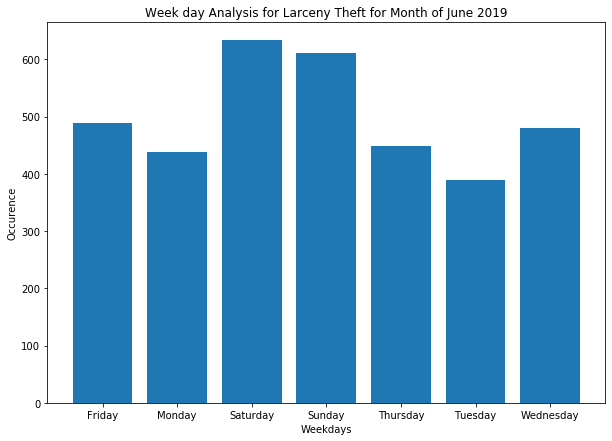

In [51]:

#creating larceny dataframe where incident category is "Larceny Theft"
larceny = crime_data[crime_data['Incident Category'] ==  "Larceny Theft"]
larceny.reset_index(inplace = True)
larceny_day = larceny.groupby('Incident Day of Week').size()
l_day = larceny_day.index.tolist()
c_ins = larceny_day.tolist()
day_bar = pd.DataFrame({'Day':l_day,'Instance':c_ins})
day_bar.set_index('Day',inplace = True)
y_pos1 = np.arange(len(l_day))
plt.rcParams['figure.figsize'] = (10,7)
plt.bar(y_pos1,c_ins)
plt.xticks(y_pos1,l_day)
plt.xlabel('Weekdays')
plt.ylabel('Occurence')
plt.title('Week day Analysis for Larceny Theft for Month of June 2019')
plt.show()

The Barchart shows higher larceny counts for Saturday and Sunday compared to other week days 
This aligns with our assumption of higher crowds in venues during holidays will lead to higher counts of crimes
Lets plot this against the box plot and visualise the data to get a fair idea of the spread for each days of the week

Text(0.5, 1.0, 'Boxplot with spread of Larceny Theft during the Week')

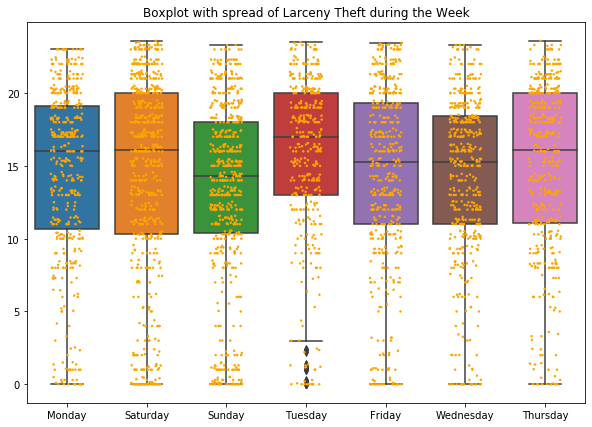

In [52]:

#copying into a new data frame “Larceny1”
larceny1 = larceny
ctime = larceny1['Incident Time'].to_list()
cday = larceny1['Incident Day of Week'].to_list()
#converting the time stamp format which is treated as string to a float for box plot visualisation
cday1 = cday
ctimelen = len(ctime)
for i in range(ctimelen):
    ctime[i] = (ctime[i][:2])+(".")+(ctime[i][3:])
    ctime[i] = float((ctime[i]))

#Creating data frame called “df” and plotting the box plot to check the spread of crimes during different times of the day
df = pd.DataFrame({'Day':cday1,'Time':ctime})
import seaborn as sns
ax = sns.boxplot(x=cday1,y=ctime,data=df)
ax = sns.stripplot(x=cday1,y=ctime,data=df,color="orange",jitter = 0.2,size=2.5)
plt.title("Boxplot with spread of Larceny Theft during the Week", loc="center")

The visualisation shows the count of crimes increases post Afternoon till late midnight and then shows a decreasing trend that lasts from early morning to early afternoon.

The Boxplot also shows the typical time zones of the crimes happening during different weekdays, notably Sunday which shows crime increasing in morning but decreasing by night as compared to other weekdays,indicating of the fact that people retire Sunday evening to get ready for Monday work.

On the other hand Saturday the counts starts increasing in morning but continues till late night, indicating of the fact that crowds tend to hang around in venues during weekends celebrating till late night

I will proceed with Plotting histogram for to analyse the theft occurrence on Saturday across various times

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


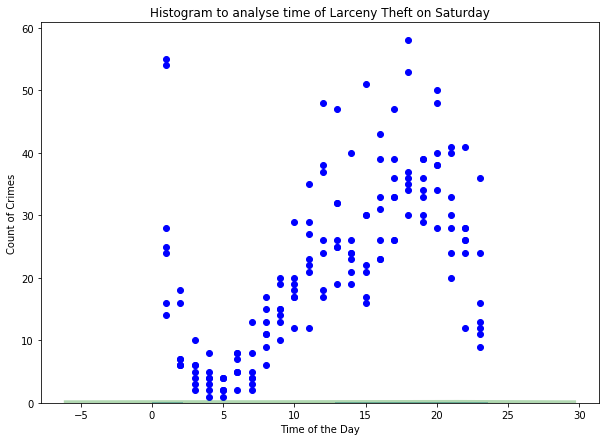

In [53]:
#creating dataframe "df1" to extract values for Saturday
df1 = df[df['Day'] ==  "Saturday"]
df1.reset_index(inplace = True)
sns.distplot( a=df1["Time"], kde=True, kde_kws={"color": "g", "alpha":0.3, "linewidth": 5, "shade":True})
plt.title("Histogram to analyse time of Larceny Theft on Saturday", loc="center")


#Copying into a newdata frame and converting the Weekday into Float
df3 = df
len_d = len(df3['Day'])
for i in range(len_d):
    if df3.loc[i,'Day'] == "Saturday":
        df3.loc[i,'Day'] = float(7)
    elif df3.loc[i,'Day'] == "Sunday":
        df3.loc[i,'Day'] = float(1)
    elif df3.loc[i,'Day'] == "Monday":
        df3.loc[i,'Day'] = float(2)
    elif df3.loc[i,'Day'] == "Tuesday":
        df3.loc[i,'Day'] = float(3)
    elif df3.loc[i,'Day'] == "Wednesday":
        df3.loc[i,'Day'] = float(4)
    elif df3.loc[i,'Day'] == "Thursday":
        df3.loc[i,'Day'] = float(5)
    elif df3.loc[i,'Day'] == "Friday":
        df3.loc[i,'Day'] = float(6)

#Binning the time
bins = np.linspace(min(df3["Time"]),max(df3["Time"]),24)
group_names = ["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23"]
df3["Time_binned"]=pd.cut(df3["Time"],bins,labels=group_names,include_lowest=True)

df4 = df3.groupby(['Day','Time_binned'])['Time_binned'].count()
df4 = df4.reset_index(name='Count')
df4 = df4.astype(int)
#Creating a scatter plot to visualise the count of crimes during the day
plt.scatter(df4.Time_binned, df4.Count,  color='blue')
plt.xlabel("Time of the Day")
plt.ylabel("Count of Crimes")
plt.show()

The scatter plot is showing a nonlinear relationship, I will refine this further by summing up all the crimes for each day for different binned time.

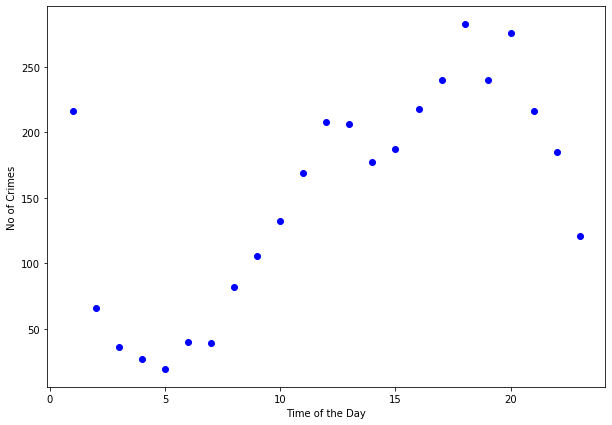

In [54]:
df5 = df4.groupby(['Time_binned'])['Count'].sum()
df5 = df5.reset_index(name='Total')
df5 = df5.astype(int)
plt.scatter(df5.Time_binned, df5.Total,  color='blue')
plt.xlabel("Time of the Day")
plt.ylabel("No of Crimes")
plt.show()

I will try to fit a linear regression to see how the model will perform to confirm the data is not suitable for linear regression

Intercept is: 5.55
Coefficient is:[0.35403727 1.22543761]
R2-score: 0.35


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


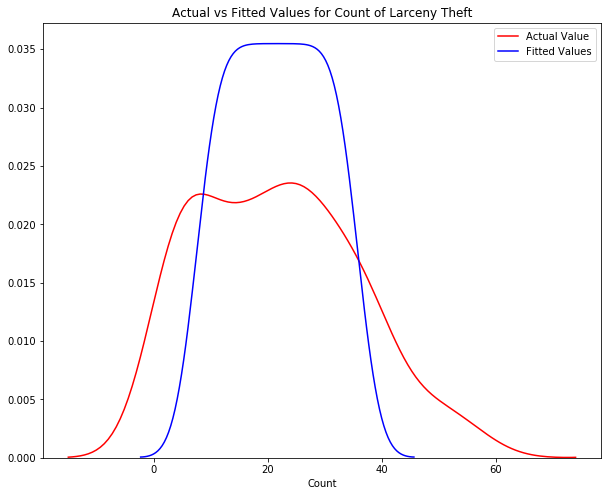

In [55]:
#Importing required libraries for model testing
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lm = LinearRegression()
Z1 =df4[['Day','Time_binned']]
lm.fit(Z1,df4['Count'])
print("Intercept is: %.2f" %(lm.intercept_))
print("Coefficient is:"+str(lm.coef_))
print("R2-score: %.2f" % (lm.score(Z1,df4['Count'])))
Yhat =lm.predict(Z1)
plt.figure(figsize=(10, 8))

ax1 = sns.distplot(df4['Count'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Count of Larceny Theft')

plt.show()
plt.close()

As expected the data is not good for a linear regression, I will try a polynomial regression with degree 3 and check the results

Coefficients:  [[  0.         -10.5034027    1.23455724  -0.03522207]]
Intercept:  [32.02728127]
Mean absolute error: 6.65
Residual sum of squares (MSE): 76.12
R2-score: 0.31


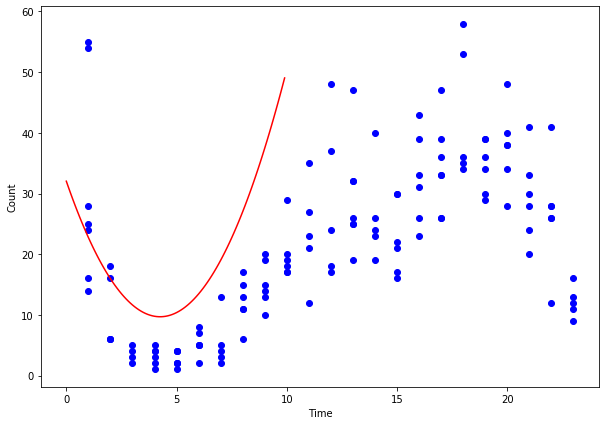

In [56]:
msk = np.random.rand(len(df4)) < 0.8
train = df4[msk]
test = df4[~msk]

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['Time_binned']])
train_y = np.asanyarray(train[['Count']])

test_x = np.asanyarray(test[['Time_binned']])
test_y = np.asanyarray(test[['Count']])


poly = PolynomialFeatures(degree=3)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

plt.scatter(train.Time_binned, train.Count,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Time")
plt.ylabel("Count")

from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Conclusion, One has to use a non linear regression model to predicted expected occurrence of crime for a binned time of the day. We will get to our next phase of this assignment in plotting the venues from FourSquare around the Neighborhood that has higher occurence of crimes

In [57]:
larceny.head()

,index,Incident Date,Incident Time,Incident Day of Week,Incident Category,Incident Subcategory,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude
0,5,03-06-2019,13:15,Monday,Larceny Theft,Larceny Theft - Other,Park,Haight Ashbury,5,37.770964,-122.431904
1,6,08-06-2019,02:15,Saturday,Larceny Theft,Larceny - From Vehicle,Park,Castro/Upper Market,8,37.765323,-122.443538
2,17,08-06-2019,01:15,Saturday,Larceny Theft,Larceny Theft - Other,Central,Chinatown,3,37.796302,-122.404412
3,22,09-06-2019,13:00,Sunday,Larceny Theft,Theft From Vehicle,Bayview,Potrero Hill,10,37.755390,-122.388001
4,27,10-06-2019,15:56,Monday,Larceny Theft,Larceny - From Vehicle,Bayview,Bayview Hunters Point,10,37.725354,-122.387368


We will use the Larceny data frame which was created earlier and group by count of crimes for the Incident Subcategory

In [58]:
larceny.head()

,index,Incident Date,Incident Time,Incident Day of Week,Incident Category,Incident Subcategory,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude
0,5,03-06-2019,13:15,Monday,Larceny Theft,Larceny Theft - Other,Park,Haight Ashbury,5,37.770964,-122.431904
1,6,08-06-2019,02:15,Saturday,Larceny Theft,Larceny - From Vehicle,Park,Castro/Upper Market,8,37.765323,-122.443538
2,17,08-06-2019,01:15,Saturday,Larceny Theft,Larceny Theft - Other,Central,Chinatown,3,37.796302,-122.404412
3,22,09-06-2019,13:00,Sunday,Larceny Theft,Theft From Vehicle,Bayview,Potrero Hill,10,37.755390,-122.388001
4,27,10-06-2019,15:56,Monday,Larceny Theft,Larceny - From Vehicle,Bayview,Bayview Hunters Point,10,37.725354,-122.387368


Before visualising the data, I will be creating three data frames grouped by means of Latitude and Longitude of all the Larceny recorded. I will then proceed to club all three dataframes into one

In [59]:
#data.groupby('month')['date'].count()
N_lat = larceny.groupby('Analysis Neighborhood')['Latitude'].mean()
N_lat = N_lat.reset_index(name='A_latitude')
N_lon = larceny.groupby('Analysis Neighborhood')['Longitude'].mean()
N_lon = N_lon.reset_index(name='A_longitude')
N_crm = larceny.groupby('Analysis Neighborhood')['Latitude'].count()
N_crm = N_crm.reset_index(name='Count')
M_larceny = pd.concat([N_crm,N_lat['A_latitude'],N_lon['A_longitude']],axis =1,sort=False)

Lets look at the dataframe "M_Larceny" which shows total count of larceny theft commited by Neighborhood, I will be using this dataframe to create Folium map that will highlight the area where the count of crimes is higher.

We will be using the Foursquare data to map the venues around these high count areas.

In [60]:
M_larceny.head()

,Analysis Neighborhood,Count,A_latitude,A_longitude
0,Bayview Hunters Point,98,37.735079,-122.391527
1,Bernal Heights,48,37.741297,-122.414987
2,Castro/Upper Market,94,37.762777,-122.432298
3,Chinatown,70,37.795593,-122.406041
4,Excelsior,29,37.721650,-122.432258


In [61]:
!conda install -c conda-forge geopy --yes 
# convert an address into latitude and longitude values
from geopy.geocoders import Nominatim 
!conda install -c conda-forge folium=0.5.0 --yes
# map rendering library
import folium

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.10

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be UPDATED:

    certifi: 2019.6.16-py36_0  anaconda --> 2019.6.16-py36_1  conda-forge

The following packages will be DOWNGRADED:

    openssl: 1.0.2s-h7b6447c_0 anaconda --> 1.0.2r-h14c3975_0 conda-forge

Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.10

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



Initialising the map for San Franciso using geolocator

In [62]:
address = 'San Francisco, CA'

geolocator = Nominatim(user_agent="sf_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
#Create map and display it
from folium import plugins
import folium
map_sf = folium.Map(location=[latitude, longitude], zoom_start=13)

I will be looping through the dataframe "M_Larceny" to map the count of crimes against the latitude and longitude of Neighbordhood

In [63]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

#Add marker one by one on the map
for i in range(0,len(M_larceny)):
   folium.Circle(
      location=[M_larceny.iloc[i]['A_latitude'], M_larceny.iloc[i]['A_longitude']],
      popup=M_larceny.iloc[i]['Analysis Neighborhood'],
      radius=int(M_larceny.iloc[i]['Count']),
      color='midnightblue',
      fill=True,
      fill_color='cyan'
   ).add_to(map_sf)
# Show map
map_sf

The map above clearly helps us analyse areas with higher concentration of Larceny theft, we will now map the venues from Foursquare to complete this assignment

In [64]:
M_larceny.sort_values(by='Count', ascending=True, inplace=True)
top_spot = M_larceny.tail(1)
top_spot.head()

,Analysis Neighborhood,Count,A_latitude,A_longitude
5,Financial District/South Beach,428,37.789779,-122.400583


I will take the top Neighborhood with highest larceny theft to further examine the types of venues around the area that are exposed to this crime

In [65]:
# Importing libraries
import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import matplotlib.cm as cm
import matplotlib.colors as colors
# Matplotlib and associated plotting modules
#import matplotlib.cm as cm
#import matplotlib.colors as colors

print('Libraries imported.')

Libraries imported.


Importing required Libraries 

In [66]:
# Working with Foursquare
CLIENT_ID = 'TBIVDOUHRRM0XDL3LRES4ZRTH5YH5FWDZRU22IBH0MX4BQD4' # your Foursquare ID
CLIENT_SECRET = 'VLSQH223MBWS2V2LWBCEM1XBVRKBE2GWAX3U241O05SS0XEW' # your Foursquare Secret
VERSION = '20190630' # Foursquare API version

print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
CLIENT_ID: TBIVDOUHRRM0XDL3LRES4ZRTH5YH5FWDZRU22IBH0MX4BQD4
CLIENT_SECRET:VLSQH223MBWS2V2LWBCEM1XBVRKBE2GWAX3U241O05SS0XEW


Using my Foursquare API credentials

In [67]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit=100'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue_Latitude', 
                  'Venue_Longitude', 
                  'Venue_Category']
    
    return(nearby_venues)

Creating function that will create the API request and loop to create DataFrame to populate the Venue Name, Venue Latitude and Longitude along with Venue Type from FourSquare for Financial District/Southbeach

In [68]:
sb_venues = getNearbyVenues(top_spot['Analysis Neighborhood'],top_spot['A_latitude'],top_spot['A_longitude'])
sb_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
0,Financial District/South Beach,37.789779,-122.400583,Blue Bottle Coffee,37.791320,-122.400983,Coffee Shop
1,Financial District/South Beach,37.789779,-122.400583,Flatiron Wine and Spirits,37.788039,-122.401466,Wine Shop
2,Financial District/South Beach,37.789779,-122.400583,Crocker Galleria Roof Terrace,37.789146,-122.402447,Garden
3,Financial District/South Beach,37.789779,-122.400583,Alexander Book Company,37.788671,-122.400626,Bookstore
4,Financial District/South Beach,37.789779,-122.400583,Philz Coffee,37.791257,-122.399166,Coffee Shop


Creating a new Datafarme called sb_venues and Examining the output of the Datafarme

In [69]:
sb_venues.columns = ['Neighborhood','N_lat','N_lon','Venue','V_lat','V_lon','V_cat']
sb_venues.head()

,Neighborhood,N_lat,N_lon,Venue,V_lat,V_lon,V_cat
0,Financial District/South Beach,37.789779,-122.400583,Blue Bottle Coffee,37.791320,-122.400983,Coffee Shop
1,Financial District/South Beach,37.789779,-122.400583,Flatiron Wine and Spirits,37.788039,-122.401466,Wine Shop
2,Financial District/South Beach,37.789779,-122.400583,Crocker Galleria Roof Terrace,37.789146,-122.402447,Garden
3,Financial District/South Beach,37.789779,-122.400583,Alexander Book Company,37.788671,-122.400626,Bookstore
4,Financial District/South Beach,37.789779,-122.400583,Philz Coffee,37.791257,-122.399166,Coffee Shop


Renaming Columns of sb_venues for easy computation and mapping in the map

In [70]:
incidents = folium.map.FeatureGroup()

for lat, lng in zip(sb_venues.V_lat, sb_venues.V_lon):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=7, 
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,))
# add incidents to map
map_sf.add_child(incidents) 
map_sf

Using folium map to display the Venues spread across Financial District/SouthBeach